# Intro to Time Series

[Time Series](https://en.wikipedia.org/wiki/Time_series) represents data indexed by dates, points in time, time periods, etc. The simplest example that comes to mind is, for example, stock prices: the price of a stock per day over a period of time.

But Time Series have applications in many other fields, specially in experimental sciences: physics, biology, medicine, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

A simple Time Series in Pandas can be represented as a regular `Series` object:

In [2]:
timestamps = [
    datetime(2018, 1, 1), datetime(2018, 1, 2), datetime(2018, 1, 3),
    datetime(2018, 1, 4), datetime(2018, 1, 5), datetime(2018, 1, 6),
    datetime(2018, 1, 7), datetime(2018, 1, 8), datetime(2018, 1, 9),
]

In [3]:
ts = pd.Series(np.random.randn(9) * 10 + 500, index=timestamps)

In [4]:
ts

2018-01-01    470.396112
2018-01-02    491.743191
2018-01-03    504.793689
2018-01-04    475.345271
2018-01-05    508.804658
2018-01-06    503.029305
2018-01-07    481.943840
2018-01-08    505.292104
2018-01-09    495.848772
dtype: float64

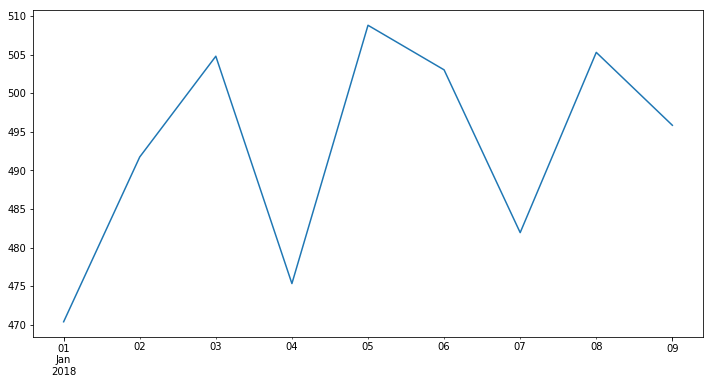

In [5]:
ts.plot(figsize=(12, 6))

The `Index` of a Time Series will be a `DatetimeIndex` (or similar, like ` TimedeltaIndex` or `PeriodIndex`):

In [6]:
ts.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq=None)

Underneath, Pandas uses `numpy` datetime types:

In [7]:
ts.index.dtype

dtype('<M8[ns]')

### `pd.Timestamp`

We created our series's index with `datetime` objects. `datetime` is the Python builtin data type to represent dates and times. Pandas has another type `pd.Tiemstamp` that's a little bit more powerful:

In [8]:
pd.Timestamp(2018, 1, 1)

Timestamp('2018-01-01 00:00:00')

In [9]:
pd.Timestamp(datetime(2018, 1, 1))

Timestamp('2018-01-01 00:00:00')

In [10]:
pd.Timestamp('2018-01-01')

Timestamp('2018-01-01 00:00:00')

Each index element in our Series, is a `pd.Timestamp` object:

In [11]:
ts.index[0]

Timestamp('2018-01-01 00:00:00')

### Indexing Time Series

Time Series are regular pandas Series (or DataFrames), indexing works in the same way as with regular objects:

In [12]:
ts

2018-01-01    470.396112
2018-01-02    491.743191
2018-01-03    504.793689
2018-01-04    475.345271
2018-01-05    508.804658
2018-01-06    503.029305
2018-01-07    481.943840
2018-01-08    505.292104
2018-01-09    495.848772
dtype: float64

In [13]:
ts[datetime(2018, 1, 3)]

504.7936885013267

In [14]:
ts[pd.Timestamp(2018, 1, 3)]

504.7936885013267

It's really convenient to use Strings to refer to datetimes:

In [15]:
ts['2018-01-03']

504.7936885013267

Time Series are usually ordered, which makes range selection (slicing) a lot easier:

In [16]:
ts['2018-01-03': '2018-01-06']

2018-01-03    504.793689
2018-01-04    475.345271
2018-01-05    508.804658
2018-01-06    503.029305
dtype: float64

Even if the actual points don't exist:

In [17]:
ts['2018-01-03T18:00:00': '2018-01-06T21:30:00']

2018-01-04    475.345271
2018-01-05    508.804658
2018-01-06    503.029305
dtype: float64

The precision of your index might change. You might be indexing by dates, dates and times, periods, years, months, etc. Pandas tries to interpret your indexes based on the precision:

In [18]:
timestamps = [
    datetime(2018, 1, 1), datetime(2018, 1, 2), datetime(2018, 1, 3),
    datetime(2018, 2, 1), datetime(2018, 2, 2), datetime(2018, 2, 3),
    datetime(2019, 1, 1), datetime(2019, 1, 2), datetime(2019, 1, 3),
]

In [19]:
ts = pd.Series(np.random.randn(9) * 10 + 500, index=timestamps)

In [20]:
ts

2018-01-01    499.559192
2018-01-02    504.635349
2018-01-03    512.731157
2018-02-01    491.996911
2018-02-02    489.262706
2018-02-03    498.094543
2019-01-01    512.878752
2019-01-02    503.455625
2019-01-03    508.608961
dtype: float64

In [21]:
ts['2018']

2018-01-01    499.559192
2018-01-02    504.635349
2018-01-03    512.731157
2018-02-01    491.996911
2018-02-02    489.262706
2018-02-03    498.094543
dtype: float64

In [22]:
ts['2019']

2019-01-01    512.878752
2019-01-02    503.455625
2019-01-03    508.608961
dtype: float64

In [23]:
ts['2018-01']

2018-01-01    499.559192
2018-01-02    504.635349
2018-01-03    512.731157
dtype: float64

### Creating DateTimeIndexes

Suppose you have a list (series, array) of sales, that you know they correspond with a given period of time. For example, you have 10 sales, which you know correspond to the days January 1st 2018, January 2nd 2018, etc. How can you construct the DateTime index? A naive approach would use an iteration to fill a list, or an array with values. But pandas has a really convenient function called `pd.date_range` that can help you generate these indexes in a smart way:

In [24]:
sales = np.random.randn(10) * 10 + 500
sales

array([510.12066103, 520.05916562, 494.72213795, 511.43517476,
       501.84823607, 506.46842024, 476.59834435, 499.39056893,
       500.2766374 , 485.20572131])

In this case, the start date is `2018-01-01` and the "frequency" is "daily":

In [25]:
index = pd.date_range(start='2018-01-01', periods=len(sales), freq='D')
index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.Series(sales, index=index)

2018-01-01    510.120661
2018-01-02    520.059166
2018-01-03    494.722138
2018-01-04    511.435175
2018-01-05    501.848236
2018-01-06    506.468420
2018-01-07    476.598344
2018-01-08    499.390569
2018-01-09    500.276637
2018-01-10    485.205721
Freq: D, dtype: float64

`freq` is a really common and useful parameter when dealing with TimeSeries in pandas. Many datetime related functions accept the freq parameter. `freq` can go from nanoseconds to years, it's really versatile:


<img src="https://user-images.githubusercontent.com/872296/38993075-f6d81e2c-43b8-11e8-9f75-9faa8fe3b5ce.png" width=600></img>

Example, we can change the frequency to be "every minute":

In [27]:
pd.Series(sales, index=pd.date_range(start='2018-01-01', periods=len(sales), freq='T'))

2018-01-01 00:00:00    510.120661
2018-01-01 00:01:00    520.059166
2018-01-01 00:02:00    494.722138
2018-01-01 00:03:00    511.435175
2018-01-01 00:04:00    501.848236
2018-01-01 00:05:00    506.468420
2018-01-01 00:06:00    476.598344
2018-01-01 00:07:00    499.390569
2018-01-01 00:08:00    500.276637
2018-01-01 00:09:00    485.205721
Freq: T, dtype: float64

Or "every 5 minutes":

In [28]:
pd.Series(sales, index=pd.date_range(start='2018-01-01', periods=len(sales), freq='5T'))

2018-01-01 00:00:00    510.120661
2018-01-01 00:05:00    520.059166
2018-01-01 00:10:00    494.722138
2018-01-01 00:15:00    511.435175
2018-01-01 00:20:00    501.848236
2018-01-01 00:25:00    506.468420
2018-01-01 00:30:00    476.598344
2018-01-01 00:35:00    499.390569
2018-01-01 00:40:00    500.276637
2018-01-01 00:45:00    485.205721
Freq: 5T, dtype: float64

### `timedelta`s and Date Offsets

Pandas handles frequencies as "Date Offset". You'll generally use aliases for the `freq` parameter (as we saw above), but you can also create the objects directly. These Date Offset objects resemble Python builtin `datetime.timedelta` objects:

In [29]:
from pandas.tseries.offsets import Hour, Minute
from datetime import timedelta

In [30]:
pd.Timestamp('2018-01-01') + timedelta(hours=3)

Timestamp('2018-01-01 03:00:00')

In [31]:
pd.Timestamp('2018-01-01') + Hour(3)

Timestamp('2018-01-01 03:00:00')

In [32]:
datetime(2018, 1, 1) + timedelta(hours=3)

datetime.datetime(2018, 1, 1, 3, 0)

In [33]:
datetime(2018, 1, 1) + Hour(3)

Timestamp('2018-01-01 03:00:00')

In [34]:
pd.Timestamp('2018-01-01') + Hour(3) + (5 * Minute())

Timestamp('2018-01-01 03:05:00')

In [35]:
pd.Timestamp('2018-01-01') + Hour(3) + Minute(5)

Timestamp('2018-01-01 03:05:00')

### More advanced Date Frequencies

Pandas can handle more complex offsets like Business days, holidays, etc. Another interesting example is when you handle "week of month" periods. For example, you have data that corresponds with the 3rd Saturday of every month. For that, you'll use the `WOM` freq alias:

<img src="img/calendar_2018.png" width=600></img>

In [36]:
pd.date_range(start='2018-01-01', periods=12, freq='WOM-3SAT')

DatetimeIndex(['2018-01-20', '2018-02-17', '2018-03-17', '2018-04-21',
               '2018-05-19', '2018-06-16', '2018-07-21', '2018-08-18',
               '2018-09-15', '2018-10-20', '2018-11-17', '2018-12-15'],
              dtype='datetime64[ns]', freq='WOM-3SAT')